In [120]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [121]:
inventory = pd.read_parquet('/Users/hj/Documents/Four-A/2nd dataset/khj/data/inventory_optimized.parquet')
inventory

,GoodsCode,Category,OriginalPrice,Inventory
0,1000,Books,12580,4452
1,1001,Health & Beauty,21530,2308
2,1002,Home & Garden,22800,5177
3,1003,Health & Beauty,22910,9705
4,1004,Health & Beauty,12780,7852
...,...,...,...,...
495,1495,Electronics,137560,4714
496,1496,Home & Garden,10520,1529
497,1497,Electronics,40260,3958
498,1498,Electronics,54950,8904


In [122]:
log = pd.read_parquet('/Users/hj/Documents/Four-A/2nd dataset/khj/data/log_eval_df.parquet')  ## 승엽님이 뽑아준
log


,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type
0,4,view,1492,15020,NaN,NaN,2022-07-04 15:11:42.511967,-1,not_ad_view
1,4,view,1492,15020,NaN,NaN,2022-07-24 14:44:40.511967,-1,not_ad_view
0,6,view,1415,12980,NaN,NaN,2022-04-22 15:49:44.166991,-1,not_ad_view
1,6,purchase,1437,35290,NaN,NaN,2022-04-26 21:46:00.166991,-1,not_ad_purchase
2,6,view,1217,16220,NaN,NaN,2022-05-03 14:26:12.811783,-1,not_ad_view
...,...,...,...,...,...,...,...,...,...
28,899999,view,1059,21230,NaN,NaN,2022-05-22 12:51:15.722389,-1,not_ad_view
29,899999,basket,1059,21230,NaN,NaN,2022-05-23 01:28:11.722389,-1,not_ad_basket
30,899999,view,1059,21230,NaN,NaN,2022-05-24 04:40:26.722389,-1,not_ad_view
31,899999,purchase,1034,12910,NaN,NaN,2022-06-20 03:40:43.722389,-1,not_ad_purchase


In [231]:
log.to_csv("log.csv", index=False)

In [123]:
customer_cluster = pd.read_parquet('/Users/hj/Documents/Four-A/2nd dataset/khj/data/customer_cluster_info (1).parquet')
customer_cluster

,CustomerID,cluster_plus
0,6,4
3,8,2
6,13,4
9,14,4
14,17,1
...,...,...
458758,899973,0
458759,899987,0
458761,899992,4
458764,899993,2


In [124]:
df = log.merge(customer_cluster, on='CustomerID', how='left').merge(inventory, on='GoodsCode', how='inner')
df

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
0,4,view,1492,15020,NaN,NaN,2022-07-04 15:11:42.511967,-1,not_ad_view,NaN,Books,15020,6631
1,4,view,1492,15020,NaN,NaN,2022-07-24 14:44:40.511967,-1,not_ad_view,NaN,Books,15020,6631
2,6,view,1415,12980,NaN,NaN,2022-04-22 15:49:44.166991,-1,not_ad_view,4,Health & Beauty,12980,9905
3,6,purchase,1437,35290,NaN,NaN,2022-04-26 21:46:00.166991,-1,not_ad_purchase,4,Home & Garden,35290,3056
4,6,view,1217,16220,NaN,NaN,2022-05-03 14:26:12.811783,-1,not_ad_view,4,Books,16220,6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096926,899999,view,1059,21230,NaN,NaN,2022-05-22 12:51:15.722389,-1,not_ad_view,4,Clothing,21230,4629
3096927,899999,basket,1059,21230,NaN,NaN,2022-05-23 01:28:11.722389,-1,not_ad_basket,4,Clothing,21230,4629
3096928,899999,view,1059,21230,NaN,NaN,2022-05-24 04:40:26.722389,-1,not_ad_view,4,Clothing,21230,4629
3096929,899999,purchase,1034,12910,NaN,NaN,2022-06-20 03:40:43.722389,-1,not_ad_purchase,4,Home & Garden,12910,3051


In [236]:
df['cluster_plus'] = df['cluster_plus'].astype(str)


In [238]:
df.to_csv("df.csv", index=False)

In [125]:
category_code_size = df.groupby(['Category', 'GoodsCode']).size()
category_code_df = category_code_size.reset_index(name='Count')
filtered_df = category_code_df[category_code_df['Count']>0]
filtered_df.sort_values('Count', ascending=False)

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3012/4277241146.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Category,GoodsCode,Count
1912,Health & Beauty,1412,6675
353,Books,1353,6660
1282,Electronics,1282,6658
1501,Health & Beauty,1001,6605
398,Books,1398,6602
...,...,...,...
1495,Electronics,1495,5827
1352,Electronics,1352,5800
817,Clothing,1317,5792
2304,Home & Garden,1304,5779


In [126]:
df['eval_type'].value_counts()

eval_type
not_ad_view          1952574
not_ad_purchase       430267
not_ad_basket         356434
ad_click              172028
ad_view_other          92698
ad_view                31670
ad_purchase_other      20746
ad_basket_other        17546
ad_basket              15209
ad_purchase             7759
Name: count, dtype: int64

In [127]:
ad_funnel = df[df['GoodsCode_ad']!= -1]
ad_funnel

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
7,6,ad_click,1437,35290,ad_google,182.31,2022-05-07 21:00:59.166991,1437,ad_click,4,Home & Garden,35290,3056
8,6,view,1437,35290,NaN,NaN,2022-05-12 10:25:41.166991,1437,ad_view,4,Home & Garden,35290,3056
37,13,ad_click,1090,21100,ad_google,158.68,2022-03-11 18:14:48.855443,1090,ad_click,4,Home & Garden,21100,8617
38,13,view,1203,85290,NaN,NaN,2022-03-17 14:31:19.855443,1090,ad_view_other,4,Electronics,85290,9173
56,14,ad_click,1000,12580,ad_google,104.04,2022-03-07 10:33:24.548570,1000,ad_click,4,Books,12580,4452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096892,899993,view,1045,120410,NaN,NaN,2022-05-11 03:04:39.372529,1019,ad_view_other,2,Electronics,120410,2622
3096916,899999,ad_click,1059,21230,ad_meta,71.35,2022-04-06 21:09:47.722389,1059,ad_click,4,Clothing,21230,4629
3096917,899999,view,1271,92940,NaN,NaN,2022-04-10 18:07:56.722389,1059,ad_view_other,4,Electronics,92940,8314
3096923,899999,ad_click,1059,21230,ad_google,94.14,2022-05-06 00:08:17.722389,1059,ad_click,4,Clothing,21230,4629


In [128]:
ad_funnel['cluster_plus'].value_counts()

cluster_plus
0      104560
4      100065
1       59650
2       57569
vip      7369
3         448
Name: count, dtype: int64

## 고객 정보 요약
### 클러스터별 요약
- 평균치 : R 372.14, F 2.6 , M 83617.15
- 중앙값 : R 370, F 2, M 60175
- *R은 신규 고객인 3번을 제외하고는 평균이 모두 비슷. 덧붙여 신규 고객 제외하곤 최근 200일 이내 구매한 고객 없음
------------------
- VIP : 우수고객 중 상위 10%
- 1번(15870명) : 우수고객 => R은 평균이나 M 두드러지게 높으며 F도 6회에 육박 => 상위 10%의 니즈를
- 2번(30916명) : 중요고객 => R과 F 는 평균보다 약간 좋은 편. 돈을 평균보다 많이 씀.
- 3번(653명) : 신규 고객 => F도 M도 낮지만, 비교적 최근에 구매함(전체 5개월 차이)
- 4번(42885명) : 일반고객 => R과 F 는 평균보다 높으나 돈을 평균보다 적게 씀
- 0번(86124명) :이탈고객 => R, F, M 모두 낮음 => R(381), F(1.59), M(37325)


In [129]:
ad_funnel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357656 entries, 7 to 3096924
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CustomerID     357656 non-null  int32         
 1   ActionType     357656 non-null  category      
 2   GoodsCode      357656 non-null  int16         
 3   Price          357656 non-null  int32         
 4   AdID           172028 non-null  category      
 5   CPC            172028 non-null  float64       
 6   Timestamp      357656 non-null  datetime64[ns]
 7   GoodsCode_ad   357656 non-null  int16         
 8   eval_type      357656 non-null  object        
 9   cluster_plus   329661 non-null  object        
 10  Category       357656 non-null  category      
 11  OriginalPrice  357656 non-null  int32         
 12  Inventory      357656 non-null  int32         
dtypes: category(3), datetime64[ns](1), float64(1), int16(2), int32(4), object(2)
memory usage: 21.5+ MB


In [130]:
# 'cluster_plus' 열의 값을 문자열로 변경
ad_funnel['cluster_plus'] = ad_funnel['cluster_plus'].astype(str)

# 치환할 값들을 지정하여 치환
ad_funnel['cluster_plus'].replace({'1': '우수고객', '2': '중요고객', 'vip': 'vip', '3':'신규고객','4':'일반고객','0':'이탈고객'}, inplace=True)
ad_funnel


/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3012/2480644312.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3012/2480644312.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/qv/tqmmyp0s5dj996k_tc

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
7,6,ad_click,1437,35290,ad_google,182.31,2022-05-07 21:00:59.166991,1437,ad_click,일반고객,Home & Garden,35290,3056
8,6,view,1437,35290,NaN,NaN,2022-05-12 10:25:41.166991,1437,ad_view,일반고객,Home & Garden,35290,3056
37,13,ad_click,1090,21100,ad_google,158.68,2022-03-11 18:14:48.855443,1090,ad_click,일반고객,Home & Garden,21100,8617
38,13,view,1203,85290,NaN,NaN,2022-03-17 14:31:19.855443,1090,ad_view_other,일반고객,Electronics,85290,9173
56,14,ad_click,1000,12580,ad_google,104.04,2022-03-07 10:33:24.548570,1000,ad_click,일반고객,Books,12580,4452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096892,899993,view,1045,120410,NaN,NaN,2022-05-11 03:04:39.372529,1019,ad_view_other,중요고객,Electronics,120410,2622
3096916,899999,ad_click,1059,21230,ad_meta,71.35,2022-04-06 21:09:47.722389,1059,ad_click,일반고객,Clothing,21230,4629
3096917,899999,view,1271,92940,NaN,NaN,2022-04-10 18:07:56.722389,1059,ad_view_other,일반고객,Electronics,92940,8314
3096923,899999,ad_click,1059,21230,ad_google,94.14,2022-05-06 00:08:17.722389,1059,ad_click,일반고객,Clothing,21230,4629


In [131]:
ad_funnel['cluster_plus'].value_counts()

cluster_plus
이탈고객    104560
일반고객    100065
우수고객     59650
중요고객     57569
nan      27995
vip       7369
신규고객       448
Name: count, dtype: int64

In [132]:
df['eval_type'].isnull().sum()

0

In [133]:
sh = pd.read_parquet('/Users/hj/Documents/Four-A/2nd dataset/khj/data/클러스터별퍼널세그먼트동일노상관.parquet')
sh

,ClusterPlus,Final,Net_Count,Adjusted_Count,Adjusted_Ratio
0,0,ad_click,9616,11014,1.00
1,0,basket,1027,1398,0.13
2,0,purchase,371,371,0.03
3,1,ad_click,3993,5330,1.00
4,1,basket,617,1337,0.25
5,1,purchase,720,720,0.14
6,2,ad_click,7273,9288,1.00
7,2,basket,963,2015,0.22
8,2,purchase,1052,1052,0.11
9,3,ad_click,67,77,1.00


In [134]:
sh1 = pd.read_parquet('/Users/hj/Documents/Four-A/2nd dataset/khj/data/클러스터별퍼널세그먼트동일.parquet')
sh1

,index,ClusterPlus,SameSegment,Final,Net_Count,Adjusted_Count,Adjusted_Ratio
0,0,0,O,ad_click,9616,10854,1.00
1,1,0,O,basket,937,1238,0.11
2,2,0,O,purchase,301,301,0.03
3,5,1,O,ad_click,3993,5006,1.00
4,6,1,O,basket,512,1013,0.20
5,7,1,O,purchase,501,501,0.10
6,10,2,O,ad_click,7273,8935,1.00
7,11,2,O,basket,831,1662,0.19
8,12,2,O,purchase,831,831,0.09
9,15,3,O,ad_click,67,77,1.00


## 전체 클러스터 대상

In [135]:
elec = ad_funnel[ad_funnel['Category'] == 'Electronics']
elec

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
38,13,view,1203,85290,NaN,NaN,2022-03-17 14:31:19.855443,1090,ad_view_other,일반고객,Electronics,85290,9173
150,32,view,1336,82700,NaN,NaN,2022-03-10 20:36:37.376860,1036,ad_view_other,중요고객,Electronics,82700,4342
151,32,view,1336,82700,NaN,NaN,2022-03-11 08:25:32.376860,1036,ad_view_other,중요고객,Electronics,82700,4342
157,32,ad_click,1499,33180,ad_google,76.56,2022-03-30 16:18:05.376860,1499,ad_click,중요고객,Electronics,33180,4591
158,32,purchase,1499,33180,NaN,NaN,2022-03-31 10:56:52.376860,1499,ad_purchase,중요고객,Electronics,33180,4591
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096786,899952,ad_click,1484,108330,ad_line,783.63,2022-03-28 11:20:18.440542,1484,ad_click,이탈고객,Electronics,108330,9595
3096788,899952,ad_click,1484,108330,ad_google,927.11,2022-03-30 04:19:09.440542,1484,ad_click,이탈고객,Electronics,108330,9595
3096789,899952,basket,1484,108330,NaN,NaN,2022-04-02 19:08:41.440542,1484,ad_basket,이탈고객,Electronics,108330,9595
3096892,899993,view,1045,120410,NaN,NaN,2022-05-11 03:04:39.372529,1019,ad_view_other,중요고객,Electronics,120410,2622


In [136]:
total_ad_funnel_adpurchase_counts1 = {'view': 0, 'basket': 0, 'purchase': 0}

# 퍼널을 계산
for idx, row in elec.iterrows():
    if row['ActionType'] == 'ad_click':
        total_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_view':
        total_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_basket':
        total_ad_funnel_adpurchase_counts1['basket'] += 1
        total_ad_funnel_adpurchase_counts1['view'] += 1  
    elif row['eval_type'] == 'ad_purchase':
        total_ad_funnel_adpurchase_counts1['purchase'] += 1
        total_ad_funnel_adpurchase_counts1['view'] += 1
        total_ad_funnel_adpurchase_counts1['basket'] += 1

print("퍼널 카운트:", total_ad_funnel_adpurchase_counts1)


퍼널 카운트: {'view': 49300, 'basket': 5018, 'purchase': 1699}


In [137]:
view_count_total_elec = 49300
basket_count_total_elec = 5018
purchase_count_total_elec = 1699


# 각 단계에서 다음 단계로의 전환율을 계산합니다.
basket_to_purchase_rate_total_elec = purchase_count_total_elec / basket_count_total_elec
view_to_basket_rate_ad_total_elec = basket_count_total_elec / view_count_total_elec
view_to_purchase_rate_total_elec = purchase_count_total_elec / view_count_total_elec

# 결과를 출력합니다.
print("View Count:", view_count_total_elec)
print("Basket Count:", basket_count_total_elec)
print("Purchase Count:", purchase_count_total_elec)
print("View to Basket Conversion Rate:", view_to_basket_rate_ad_total_elec)
print("Basket to Purchase Conversion Rate:", basket_to_purchase_rate_total_elec)
print("View to Purchase Conversion Rate:",view_to_purchase_rate_total_elec)


View Count: 49300
Basket Count: 5018
Purchase Count: 1699
View to Basket Conversion Rate: 0.10178498985801217
Basket to Purchase Conversion Rate: 0.3385811080111598
View to Purchase Conversion Rate: 0.034462474645030425


In [138]:
data = dict(
    number=[49300,5018,1699],
    stage=['view','basket','purchase'],
    rate=[1,0.10178498985801217,0.034462474645030425]
)
fig = px.funnel(data, x='rate', y='stage', title='전체고객 Funnel (Electronics)')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()

## 이탈고객 (0)

In [139]:
etal = ad_funnel[ad_funnel['cluster_plus']=='이탈고객']
etal

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
183,33,ad_click,1149,17780,ad_line,131.84,2022-04-10 18:14:48.486139,1149,ad_click,이탈고객,Books,17780,4294
304,84,ad_click,1348,7920,ad_line,66.44,2022-04-24 13:06:24.760000,1348,ad_click,이탈고객,Clothing,7920,7446
305,84,view,1392,5360,NaN,NaN,2022-04-25 07:08:36.961569,1348,ad_view_other,이탈고객,Health & Beauty,5360,3433
306,84,view,1076,146320,NaN,NaN,2022-04-26 01:59:16.961569,1348,ad_view_other,이탈고객,Electronics,146320,7766
307,84,view,1076,146320,NaN,NaN,2022-04-28 10:21:21.961569,1348,ad_view_other,이탈고객,Electronics,146320,7766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096788,899952,ad_click,1484,108330,ad_google,927.11,2022-03-30 04:19:09.440542,1484,ad_click,이탈고객,Electronics,108330,9595
3096789,899952,basket,1484,108330,NaN,NaN,2022-04-02 19:08:41.440542,1484,ad_basket,이탈고객,Electronics,108330,9595
3096790,899952,view,1418,21060,NaN,NaN,2022-04-02 20:12:36.440542,1484,ad_view_other,이탈고객,Health & Beauty,21060,1001
3096825,899965,ad_click,1196,17690,ad_line,45.31,2022-03-16 09:19:26.486139,1196,ad_click,이탈고객,Home & Garden,17690,3033


In [140]:
etal = etal[etal['Category'] == 'Electronics']
etal

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
306,84,view,1076,146320,NaN,NaN,2022-04-26 01:59:16.961569,1348,ad_view_other,이탈고객,Electronics,146320,7766
307,84,view,1076,146320,NaN,NaN,2022-04-28 10:21:21.961569,1348,ad_view_other,이탈고객,Electronics,146320,7766
375,102,view,1081,105310,NaN,NaN,2022-04-03 04:18:43.530419,1459,ad_view_other,이탈고객,Electronics,105310,6408
1093,256,ad_click,1265,49280,ad_line,132.12,2022-04-14 11:12:17.511967,1265,ad_click,이탈고객,Electronics,49280,3745
1658,432,ad_click,1385,78100,ad_google,486.17,2022-04-06 12:38:26.855443,1385,ad_click,이탈고객,Electronics,78100,2763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096634,899919,ad_click,1486,41930,ad_meta,168.45,2022-05-12 22:46:13.794648,1486,ad_click,이탈고객,Electronics,41930,7675
3096635,899919,view,1486,41930,NaN,NaN,2022-05-18 13:06:55.794648,1486,ad_view,이탈고객,Electronics,41930,7675
3096786,899952,ad_click,1484,108330,ad_line,783.63,2022-03-28 11:20:18.440542,1484,ad_click,이탈고객,Electronics,108330,9595
3096788,899952,ad_click,1484,108330,ad_google,927.11,2022-03-30 04:19:09.440542,1484,ad_click,이탈고객,Electronics,108330,9595


In [141]:
etal_ad_funnel_adpurchase_counts = {'view': 0, 'basket': 0, 'purchase': 0}

# 퍼널을 계산
for idx, row in etal.iterrows():
    if row['ActionType'] == 'ad_click':
        etal_ad_funnel_adpurchase_counts['view'] += 1
    elif row['ActionType'] == 'view' and row['GoodsCode'] == row['GoodsCode_ad']:
        etal_ad_funnel_adpurchase_counts['view'] += 1
    elif row['ActionType'] == 'basket' and row['GoodsCode'] == row['GoodsCode_ad']:
        etal_ad_funnel_adpurchase_counts['basket'] += 1
        etal_ad_funnel_adpurchase_counts['view'] += 1  
    elif row['ActionType'] == 'purchase' and row['GoodsCode'] == row['GoodsCode_ad']:
        etal_ad_funnel_adpurchase_counts['purchase'] += 1
        etal_ad_funnel_adpurchase_counts['view'] += 1
        etal_ad_funnel_adpurchase_counts['basket'] += 1

print("퍼널 카운트:", etal_ad_funnel_adpurchase_counts)


퍼널 카운트: {'view': 14104, 'basket': 1208, 'purchase': 264}


In [142]:
etal_ad_funnel_adpurchase_counts2 = {'view': 0, 'basket': 0, 'purchase': 0}

# 퍼널을 계산
for idx, row in etal.iterrows():
    if row['ActionType'] == 'ad_click':
        etal_ad_funnel_adpurchase_counts2['view'] += 1
    if row['eval_type'] == 'ad_view':
        etal_ad_funnel_adpurchase_counts2['view'] += 1
    elif row['eval_type'] == 'ad_basket':
        etal_ad_funnel_adpurchase_counts2['basket'] += 1
        etal_ad_funnel_adpurchase_counts2['view'] += 1  
    elif row['eval_type'] == 'ad_purchase':
        etal_ad_funnel_adpurchase_counts2['purchase'] += 1
        etal_ad_funnel_adpurchase_counts2['view'] += 1
        etal_ad_funnel_adpurchase_counts2['basket'] += 1

print("퍼널 카운트:", etal_ad_funnel_adpurchase_counts2)

# 퍼널 카운트: {'view': 11014, 'basket': 944, 'purchase': 264}


퍼널 카운트: {'view': 14104, 'basket': 1208, 'purchase': 264}


In [143]:
view_count_etal_elec = 14104
basket_count_etal_elec = 1208
purchase_count_etal_elec = 264


# 각 단계에서 다음 단계로의 전환율을 계산합니다.
basket_to_purchase_rate_etal_elec = purchase_count_etal_elec / basket_count_etal_elec
view_to_basket_rate_ad_etal_elec = basket_count_etal_elec / view_count_etal_elec
view_to_purchase_rate_etal_elec = purchase_count_etal_elec / view_count_etal_elec

# 결과를 출력합니다.
print("View Count:", view_count_etal_elec)
print("Basket Count:", basket_count_etal_elec)
print("Purchase Count:", purchase_count_etal_elec)
print("View to Basket Conversion Rate:", view_to_basket_rate_ad_etal_elec)
print("Basket to Purchase Conversion Rate:", basket_to_purchase_rate_etal_elec)
print("View to Purchase Conversion Rate:",view_to_purchase_rate_etal_elec)


View Count: 14104
Basket Count: 1208
Purchase Count: 264
View to Basket Conversion Rate: 0.08564946114577425
Basket to Purchase Conversion Rate: 0.2185430463576159
View to Purchase Conversion Rate: 0.01871809415768576


In [144]:
data = dict(
    number=[14104,1208,264],
    stage=['view','basket','purchase'],
    rate=[1,0.08564946114577425,0.01871809415768576]
)
fig = px.funnel(data, x='rate', y='stage', title='이탈고객 Funnel (Electronics)')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()

## 우수고객 (1)

In [145]:
usu = ad_funnel[ad_funnel['cluster_plus']=='우수고객']
usu

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
443,119,ad_click,1484,108330,ad_meta,1049.62,2022-04-06 02:56:08.855443,1484,ad_click,우수고객,Electronics,108330,9595
444,119,view,1129,24990,NaN,NaN,2022-04-06 07:51:29.961569,1484,ad_view_other,우수고객,Health & Beauty,24990,6387
445,119,view,1129,24990,NaN,NaN,2022-04-10 20:56:20.961569,1484,ad_view_other,우수고객,Health & Beauty,24990,6387
446,119,view,1337,10650,NaN,NaN,2022-04-11 21:09:57.961569,1484,ad_view_other,우수고객,Books,10650,3844
447,119,view,1129,24990,NaN,NaN,2022-04-13 00:44:28.961569,1484,ad_view_other,우수고객,Health & Beauty,24990,6387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096711,899940,purchase,1459,28130,NaN,NaN,2022-04-24 11:21:31.160778,1439,ad_purchase_other,우수고객,Home & Garden,28130,2560
3096712,899940,view,1347,104910,NaN,NaN,2022-04-24 20:30:26.160778,1439,ad_view_other,우수고객,Electronics,104910,5116
3096713,899940,purchase,1439,109620,NaN,NaN,2022-04-25 14:51:30.160778,1439,ad_purchase,우수고객,Electronics,109620,4144
3096714,899940,view,1459,28130,NaN,NaN,2022-04-28 13:47:29.160778,1439,ad_view_other,우수고객,Home & Garden,28130,2560


In [146]:
usu = usu[usu['Category']=='Electronics']
usu

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
443,119,ad_click,1484,108330,ad_meta,1049.62,2022-04-06 02:56:08.855443,1484,ad_click,우수고객,Electronics,108330,9595
452,119,ad_click,1484,108330,ad_line,783.63,2022-05-05 04:46:46.855443,1484,ad_click,우수고객,Electronics,108330,9595
466,122,view,1197,34900,NaN,NaN,2022-03-25 00:03:40.961569,1191,ad_view_other,우수고객,Electronics,34900,7467
470,122,view,1197,34900,NaN,NaN,2022-04-10 07:40:19.961569,1095,ad_view_other,우수고객,Electronics,34900,7467
724,163,ad_click,1347,104910,ad_line,682.59,2022-03-08 15:00:52.322370,1347,ad_click,우수고객,Electronics,104910,5116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096686,899928,view,1085,63720,NaN,NaN,2022-05-22 17:49:42.127184,1465,ad_view_other,우수고객,Electronics,63720,8101
3096710,899940,ad_click,1439,109620,ad_meta,534.15,2022-04-22 20:50:37.160778,1439,ad_click,우수고객,Electronics,109620,4144
3096712,899940,view,1347,104910,NaN,NaN,2022-04-24 20:30:26.160778,1439,ad_view_other,우수고객,Electronics,104910,5116
3096713,899940,purchase,1439,109620,NaN,NaN,2022-04-25 14:51:30.160778,1439,ad_purchase,우수고객,Electronics,109620,4144


In [147]:
usu_ad_funnel_adpurchase_counts1 = {'view': 0, 'basket': 0, 'purchase': 0}

# 퍼널을 계산
for idx, row in usu.iterrows():
    if row['ActionType'] == 'ad_click':
        usu_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_view':
        usu_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_basket':
        usu_ad_funnel_adpurchase_counts1['basket'] += 1
        usu_ad_funnel_adpurchase_counts1['view'] += 1  
    elif row['eval_type'] == 'ad_purchase':
        usu_ad_funnel_adpurchase_counts1['purchase'] += 1
        usu_ad_funnel_adpurchase_counts1['view'] += 1
        usu_ad_funnel_adpurchase_counts1['basket'] += 1

print("퍼널 카운트:", usu_ad_funnel_adpurchase_counts1)


퍼널 카운트: {'view': 7447, 'basket': 943, 'purchase': 407}


In [148]:
view_count_usu_elec = 7447
basket_count_usu_elec = 943
purchase_count_usu_elec = 407


# 각 단계에서 다음 단계로의 전환율을 계산합니다.
basket_to_purchase_rate_usu_elec = purchase_count_usu_elec / basket_count_usu_elec
view_to_basket_rate_ad_usu_elec = basket_count_usu_elec / view_count_usu_elec
view_to_purchase_rate_usu_elec = purchase_count_usu_elec / view_count_usu_elec

# 결과를 출력합니다.
print("View Count:", view_count_usu_elec)
print("Basket Count:", basket_count_usu_elec)
print("Purchase Count:", purchase_count_usu_elec)
print("View to Basket Conversion Rate:", view_to_basket_rate_ad_usu_elec)
print("Basket to Purchase Conversion Rate:", basket_to_purchase_rate_usu_elec)
print("View to Purchase Conversion Rate:",view_to_purchase_rate_usu_elec)


View Count: 7447
Basket Count: 943
Purchase Count: 407
View to Basket Conversion Rate: 0.12662817241842353
Basket to Purchase Conversion Rate: 0.43160127253446445
View to Purchase Conversion Rate: 0.05465288035450517


In [149]:
data = dict(
    number=[7447,943,407],
    stage=['view','basket','purchase'],
    rate=[1,0.12662817241842353,0.05465288035450517]
)
fig = px.funnel(data, x='rate', y='stage', title='우수고객 Funnel (Electronics)')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()

## VIP

In [150]:
vip = ad_funnel[ad_funnel['cluster_plus']=='vip']
vip

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
1687,444,ad_click,1241,69300,ad_line,290.20,2022-04-27 16:17:49.794648,1241,ad_click,vip,Electronics,69300,2933
1688,444,view,1170,77590,NaN,NaN,2022-04-28 12:41:14.486139,1241,ad_view_other,vip,Electronics,77590,6468
1689,444,view,1210,35120,NaN,NaN,2022-04-30 14:51:28.794648,1241,ad_view_other,vip,Home & Garden,35120,1806
1690,444,view,1487,19730,NaN,NaN,2022-05-01 01:28:21.486139,1241,ad_view_other,vip,Home & Garden,19730,1955
2001,520,ad_click,1270,13210,ad_meta,86.00,2022-04-01 15:23:29.637583,1270,ad_click,vip,Home & Garden,13210,5311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095491,899378,view,1024,82980,NaN,NaN,2022-05-04 06:30:44.039013,1092,ad_view_other,vip,Electronics,82980,4186
3095492,899378,ad_click,1474,38640,ad_meta,210.22,2022-05-06 08:31:26.039013,1474,ad_click,vip,Home & Garden,38640,9503
3095493,899378,view,1474,38640,NaN,NaN,2022-05-08 19:54:24.039013,1474,ad_view,vip,Home & Garden,38640,9503
3095494,899378,view,1462,13020,NaN,NaN,2022-05-09 23:00:47.039013,1474,ad_view_other,vip,Health & Beauty,13020,9941


In [151]:
vip = vip[vip['Category']=='Electronics']
vip

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
1687,444,ad_click,1241,69300,ad_line,290.20,2022-04-27 16:17:49.794648,1241,ad_click,vip,Electronics,69300,2933
1688,444,view,1170,77590,NaN,NaN,2022-04-28 12:41:14.486139,1241,ad_view_other,vip,Electronics,77590,6468
2007,520,purchase,1267,64210,NaN,NaN,2022-04-11 17:58:16.008345,1248,ad_purchase_other,vip,Electronics,64210,7183
2008,520,view,1267,64210,NaN,NaN,2022-04-17 10:53:00.008345,1248,ad_view_other,vip,Electronics,64210,7183
2860,741,view,1202,44480,NaN,NaN,2022-03-25 00:24:58.008345,1288,ad_view_other,vip,Electronics,44480,9896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095483,899378,ad_click,1247,89810,ad_line,203.04,2022-04-24 10:40:27.039013,1247,ad_click,vip,Electronics,89810,6016
3095484,899378,view,1024,82980,NaN,NaN,2022-04-26 07:36:43.039013,1247,ad_view_other,vip,Electronics,82980,4186
3095485,899378,purchase,1247,89810,NaN,NaN,2022-04-27 01:37:23.039013,1247,ad_purchase,vip,Electronics,89810,6016
3095490,899378,basket,1024,82980,NaN,NaN,2022-04-30 09:17:36.039013,1092,ad_basket_other,vip,Electronics,82980,4186


In [152]:
vip_ad_funnel_adpurchase_counts1 = {'view': 0, 'basket': 0, 'purchase': 0}

# 퍼널을 계산
for idx, row in vip.iterrows():
    if row['ActionType'] == 'ad_click':
        vip_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_view':
        vip_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_basket':
        vip_ad_funnel_adpurchase_counts1['basket'] += 1
        vip_ad_funnel_adpurchase_counts1['view'] += 1  
    elif row['eval_type'] == 'ad_purchase':
        vip_ad_funnel_adpurchase_counts1['purchase'] += 1
        vip_ad_funnel_adpurchase_counts1['view'] += 1
        vip_ad_funnel_adpurchase_counts1['basket'] += 1

print("퍼널 카운트:", vip_ad_funnel_adpurchase_counts1)


퍼널 카운트: {'view': 1222, 'basket': 178, 'purchase': 80}


In [153]:
view_count_vip_elec = 1222
basket_count_vip_elec = 178
purchase_count_vip_elec = 80


# 각 단계에서 다음 단계로의 전환율을 계산합니다.
basket_to_purchase_rate_vip_elec = purchase_count_vip_elec / basket_count_vip_elec
view_to_basket_rate_ad_vip_elec = basket_count_vip_elec / view_count_vip_elec
view_to_purchase_rate_vip_elec = purchase_count_vip_elec / view_count_vip_elec

# 결과를 출력합니다.
print("View Count:", view_count_vip_elec)
print("Basket Count:", basket_count_vip_elec)
print("Purchase Count:", purchase_count_vip_elec)
print("View to Basket Conversion Rate:", view_to_basket_rate_ad_vip_elec)
print("Basket to Purchase Conversion Rate:", basket_to_purchase_rate_vip_elec)
print("View to Purchase Conversion Rate:",view_to_purchase_rate_vip_elec)


View Count: 1222
Basket Count: 178
Purchase Count: 80
View to Basket Conversion Rate: 0.14566284779050737
Basket to Purchase Conversion Rate: 0.449438202247191
View to Purchase Conversion Rate: 0.06546644844517185


In [154]:
data = dict(
    number=[1222,178,80],
    stage=['view','basket','purchase'],
    rate=[1,0.14566284779050737,0.06546644844517185]
)
fig = px.funnel(data, x='rate', y='stage', title='VIP Funnel (Electronics)')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()

## 중요고객 (2)

In [155]:
jyungyo = ad_funnel[ad_funnel['cluster_plus']=='중요고객']
jyungyo

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
148,32,ad_click,1036,38250,ad_line,195.52,2022-03-06 19:05:33.376860,1036,ad_click,중요고객,Home & Garden,38250,9633
149,32,view,1434,18720,NaN,NaN,2022-03-10 09:08:40.376860,1036,ad_view_other,중요고객,Books,18720,7082
150,32,view,1336,82700,NaN,NaN,2022-03-10 20:36:37.376860,1036,ad_view_other,중요고객,Electronics,82700,4342
151,32,view,1336,82700,NaN,NaN,2022-03-11 08:25:32.376860,1036,ad_view_other,중요고객,Electronics,82700,4342
157,32,ad_click,1499,33180,ad_google,76.56,2022-03-30 16:18:05.376860,1499,ad_click,중요고객,Electronics,33180,4591
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096877,899993,ad_click,1174,7210,ad_line,19.07,2022-02-28 05:16:16.372529,1174,ad_click,중요고객,Books,7210,9502
3096878,899993,basket,1019,16840,NaN,NaN,2022-02-28 23:16:48.372529,1174,ad_basket_other,중요고객,Books,16840,3106
3096879,899993,view,1019,16840,NaN,NaN,2022-03-04 08:11:43.372529,1174,ad_view_other,중요고객,Books,16840,3106
3096891,899993,ad_click,1019,16840,ad_meta,88.20,2022-05-09 09:32:29.372529,1019,ad_click,중요고객,Books,16840,3106


In [156]:
jyungyo = jyungyo[jyungyo['Category']=='Electronics']
jyungyo

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
150,32,view,1336,82700,NaN,NaN,2022-03-10 20:36:37.376860,1036,ad_view_other,중요고객,Electronics,82700,4342
151,32,view,1336,82700,NaN,NaN,2022-03-11 08:25:32.376860,1036,ad_view_other,중요고객,Electronics,82700,4342
157,32,ad_click,1499,33180,ad_google,76.56,2022-03-30 16:18:05.376860,1499,ad_click,중요고객,Electronics,33180,4591
158,32,purchase,1499,33180,NaN,NaN,2022-03-31 10:56:52.376860,1499,ad_purchase,중요고객,Electronics,33180,4591
160,32,purchase,1336,82700,NaN,NaN,2022-04-04 20:49:21.376860,1499,ad_purchase_other,중요고객,Electronics,82700,4342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095604,899446,view,1313,141540,NaN,NaN,2022-04-23 15:46:07.340987,1313,ad_view,중요고객,Electronics,141540,9073
3096329,899759,ad_click,1224,85500,ad_line,803.11,2022-02-22 18:26:59.961569,1224,ad_click,중요고객,Electronics,85500,7402
3096545,899842,ad_click,1388,48400,ad_google,193.26,2022-05-25 23:14:27.187373,1388,ad_click,중요고객,Electronics,48400,8099
3096546,899842,purchase,1388,48400,NaN,NaN,2022-05-30 06:20:44.187373,1388,ad_purchase,중요고객,Electronics,48400,8099


In [157]:
jyungyo_ad_funnel_adpurchase_counts1 = {'view': 0, 'basket': 0, 'purchase': 0}

# 퍼널을 계산
for idx, row in jyungyo.iterrows():
    if row['ActionType'] == 'ad_click':
        jyungyo_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_view':
        jyungyo_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_basket':
        jyungyo_ad_funnel_adpurchase_counts1['basket'] += 1
        jyungyo_ad_funnel_adpurchase_counts1['view'] += 1  
    elif row['eval_type'] == 'ad_purchase':
        jyungyo_ad_funnel_adpurchase_counts1['purchase'] += 1
        jyungyo_ad_funnel_adpurchase_counts1['view'] += 1
        jyungyo_ad_funnel_adpurchase_counts1['basket'] += 1

print("퍼널 카운트:", jyungyo_ad_funnel_adpurchase_counts1)


퍼널 카운트: {'view': 12688, 'basket': 1597, 'purchase': 710}


In [158]:
view_count_jyungyo_elec = 12688
basket_count_jyungyo_elec = 1597
purchase_count_jyungyo_elec = 710


# 각 단계에서 다음 단계로의 전환율을 계산합니다.
basket_to_purchase_rate_jyungyo_elec = purchase_count_jyungyo_elec / basket_count_jyungyo_elec
view_to_basket_rate_ad_jyungyo_elec = basket_count_jyungyo_elec / view_count_jyungyo_elec
view_to_purchase_rate_jyungyo_elec = purchase_count_jyungyo_elec / view_count_jyungyo_elec

# 결과를 출력합니다.
print("View Count:", view_count_jyungyo_elec)
print("Basket Count:", basket_count_jyungyo_elec)
print("Purchase Count:", purchase_count_jyungyo_elec)
print("View to Basket Conversion Rate:", view_to_basket_rate_ad_jyungyo_elec)
print("Basket to Purchase Conversion Rate:", basket_to_purchase_rate_jyungyo_elec)
print("View to Purchase Conversion Rate:",view_to_purchase_rate_jyungyo_elec)


View Count: 12688
Basket Count: 1597
Purchase Count: 710
View to Basket Conversion Rate: 0.12586696090794453
Basket to Purchase Conversion Rate: 0.4445835942391985
View to Purchase Conversion Rate: 0.055958385876418666


In [159]:
data = dict(
    number=[12688,1597,710],
    stage=['view','basket','purchase'],
    rate=[1,0.12586696090794453,0.055958385876418666]
)
fig = px.funnel(data, x='rate', y='stage', title='중요고객 Funnel (Electronics)')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()

## 신규고객 (3)

In [160]:
new = ad_funnel[ad_funnel['cluster_plus']=='신규고객']
new

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
1419,340,ad_click,1451,18470,ad_google,75.42,2022-06-13 23:20:07.502999,1451,ad_click,신규고객,Books,18470,9601
2081,539,ad_click,1010,19260,ad_meta,117.33,2022-05-19 09:04:11.008345,1010,ad_click,신규고객,Books,19260,5491
2082,539,view,1081,105310,NaN,NaN,2022-05-21 05:54:05.008345,1010,ad_view_other,신규고객,Electronics,105310,6408
2087,539,ad_click,1108,34540,ad_meta,280.72,2022-12-24 20:04:37.127184,1108,ad_click,신규고객,Home & Garden,34540,3322
2088,539,ad_click,1108,34540,ad_google,201.92,2023-01-10 21:35:42.127184,1108,ad_click,신규고객,Home & Garden,34540,3322
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047661,882211,view,1246,16840,NaN,NaN,2022-05-12 00:37:32.047280,1407,ad_view_other,신규고객,Books,16840,2218
3054439,884714,ad_click,1454,5550,ad_meta,21.28,2022-09-15 17:10:20.127184,1454,ad_click,신규고객,Books,5550,8294
3054440,884714,purchase,1454,5550,NaN,NaN,2022-09-19 14:23:58.127184,1454,ad_purchase,신규고객,Books,5550,8294
3082715,894731,ad_click,1114,75180,ad_google,160.99,2023-01-05 17:49:11.127184,1114,ad_click,신규고객,Electronics,75180,4640


In [161]:
new = new[new['Category']=='Electronics']
new

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
2082,539,view,1081,105310,NaN,NaN,2022-05-21 05:54:05.008345,1010,ad_view_other,신규고객,Electronics,105310,6408
5551,1456,ad_click,1256,107510,ad_google,882.44,2022-03-06 21:57:09.555126,1256,ad_click,신규고객,Electronics,107510,9228
5552,1456,view,1197,34900,NaN,NaN,2022-03-09 02:57:29.555126,1256,ad_view_other,신규고객,Electronics,34900,7467
83708,21679,ad_click,1182,106010,ad_line,514.20,2022-05-13 23:06:15.052427,1182,ad_click,신규고객,Electronics,106010,9436
91484,23554,ad_click,1171,104650,ad_meta,379.62,2022-10-10 02:29:09.511967,1171,ad_click,신규고객,Electronics,104650,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968048,852930,ad_click,1018,124990,ad_google,973.96,2022-03-24 03:44:59.127184,1018,ad_click,신규고객,Electronics,124990,3679
2988403,860743,ad_click,1358,48200,ad_google,147.38,2022-12-20 16:22:19.127184,1358,ad_click,신규고객,Electronics,48200,1791
3009455,868283,ad_click,1221,88140,ad_google,453.33,2022-12-08 06:52:53.127184,1221,ad_click,신규고객,Electronics,88140,1824
3047640,882211,ad_click,1234,93910,ad_meta,855.93,2022-03-13 19:31:42.047280,1234,ad_click,신규고객,Electronics,93910,8312


In [162]:
new_ad_funnel_adpurchase_counts1 = {'view': 0, 'basket': 0, 'purchase': 0}

# 퍼널을 계산
for idx, row in new.iterrows():
    if row['ActionType'] == 'ad_click':
        new_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_view':
        new_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_basket':
        new_ad_funnel_adpurchase_counts1['basket'] += 1
        new_ad_funnel_adpurchase_counts1['view'] += 1  
    elif row['eval_type'] == 'ad_purchase':
        new_ad_funnel_adpurchase_counts1['purchase'] += 1
        new_ad_funnel_adpurchase_counts1['view'] += 1
        new_ad_funnel_adpurchase_counts1['basket'] += 1

print("퍼널 카운트:", new_ad_funnel_adpurchase_counts1)


퍼널 카운트: {'view': 99, 'basket': 11, 'purchase': 4}


In [163]:
view_count_new_elec = 99
basket_count_new_elec = 11
purchase_count_new_elec = 4


# 각 단계에서 다음 단계로의 전환율을 계산합니다.
basket_to_purchase_rate_new_elec = purchase_count_new_elec / basket_count_new_elec
view_to_basket_rate_ad_new_elec = basket_count_new_elec / view_count_new_elec
view_to_purchase_rate_new_elec = purchase_count_new_elec / view_count_new_elec

# 결과를 출력합니다.
print("View Count:", view_count_new_elec)
print("Basket Count:", basket_count_new_elec)
print("Purchase Count:", purchase_count_new_elec)
print("View to Basket Conversion Rate:", view_to_basket_rate_ad_new_elec)
print("Basket to Purchase Conversion Rate:", basket_to_purchase_rate_new_elec)
print("View to Purchase Conversion Rate:",view_to_purchase_rate_new_elec)


View Count: 99
Basket Count: 11
Purchase Count: 4
View to Basket Conversion Rate: 0.1111111111111111
Basket to Purchase Conversion Rate: 0.36363636363636365
View to Purchase Conversion Rate: 0.04040404040404041


In [164]:
data = dict(
    number=[99,11,4],
    stage=['view','basket','purchase'],
    rate=[1,0.1111111111111111,0.04040404040404041]
)
fig = px.funnel(data, x='rate', y='stage', title='신규고객 Funnel (Electronics)')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()

## 일반고객 (4)

In [165]:
normal = ad_funnel[ad_funnel['cluster_plus']=='일반고객']
normal

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
7,6,ad_click,1437,35290,ad_google,182.31,2022-05-07 21:00:59.166991,1437,ad_click,일반고객,Home & Garden,35290,3056
8,6,view,1437,35290,NaN,NaN,2022-05-12 10:25:41.166991,1437,ad_view,일반고객,Home & Garden,35290,3056
37,13,ad_click,1090,21100,ad_google,158.68,2022-03-11 18:14:48.855443,1090,ad_click,일반고객,Home & Garden,21100,8617
38,13,view,1203,85290,NaN,NaN,2022-03-17 14:31:19.855443,1090,ad_view_other,일반고객,Electronics,85290,9173
56,14,ad_click,1000,12580,ad_google,104.04,2022-03-07 10:33:24.548570,1000,ad_click,일반고객,Books,12580,4452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096780,899950,view,1278,42680,NaN,NaN,2022-06-14 06:06:39.122857,1467,ad_view_other,일반고객,Home & Garden,42680,3604
3096916,899999,ad_click,1059,21230,ad_meta,71.35,2022-04-06 21:09:47.722389,1059,ad_click,일반고객,Clothing,21230,4629
3096917,899999,view,1271,92940,NaN,NaN,2022-04-10 18:07:56.722389,1059,ad_view_other,일반고객,Electronics,92940,8314
3096923,899999,ad_click,1059,21230,ad_google,94.14,2022-05-06 00:08:17.722389,1059,ad_click,일반고객,Clothing,21230,4629


In [166]:
normal = normal[normal['Category']=='Electronics']
normal

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
38,13,view,1203,85290,NaN,NaN,2022-03-17 14:31:19.855443,1090,ad_view_other,일반고객,Electronics,85290,9173
340,88,view,1161,31750,NaN,NaN,2022-05-14 19:47:05.336522,1144,ad_view_other,일반고객,Electronics,31750,3667
1029,241,view,1272,79250,NaN,NaN,2022-05-18 14:33:12.478779,1162,ad_view_other,일반고객,Electronics,79250,3383
1030,241,ad_click,1272,79250,ad_google,652.70,2022-05-20 15:31:35.478779,1272,ad_click,일반고객,Electronics,79250,3383
1031,241,view,1272,79250,NaN,NaN,2022-05-20 19:40:01.478779,1272,ad_view,일반고객,Electronics,79250,3383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096189,899704,purchase,1038,40180,NaN,NaN,2022-05-08 11:08:22.794648,1188,ad_purchase_other,일반고객,Electronics,40180,1074
3096190,899704,purchase,1188,46660,NaN,NaN,2022-05-11 07:37:56.794648,1188,ad_purchase,일반고객,Electronics,46660,1920
3096191,899704,basket,1038,40180,NaN,NaN,2022-05-11 14:04:53.794648,1188,ad_basket_other,일반고객,Electronics,40180,1074
3096253,899729,ad_click,1110,141930,ad_google,761.34,2022-04-24 16:47:48.020726,1110,ad_click,일반고객,Electronics,141930,7960


In [167]:
normal_ad_funnel_adpurchase_counts1 = {'view': 0, 'basket': 0, 'purchase': 0}

# 퍼널을 계산
for idx, row in normal.iterrows():
    if row['ActionType'] == 'ad_click':
        normal_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_view':
        normal_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['eval_type'] == 'ad_basket':
        normal_ad_funnel_adpurchase_counts1['basket'] += 1
        normal_ad_funnel_adpurchase_counts1['view'] += 1  
    elif row['eval_type'] == 'ad_purchase':
        normal_ad_funnel_adpurchase_counts1['purchase'] += 1
        normal_ad_funnel_adpurchase_counts1['view'] += 1
        normal_ad_funnel_adpurchase_counts1['basket'] += 1

print("퍼널 카운트:", normal_ad_funnel_adpurchase_counts1)


퍼널 카운트: {'view': 8680, 'basket': 878, 'purchase': 234}


In [168]:
view_count_normal_elec = 8680
basket_count_normal_elec = 878
purchase_count_normal_elec = 234


# 각 단계에서 다음 단계로의 전환율을 계산합니다.
basket_to_purchase_rate_normal_elec = purchase_count_normal_elec / basket_count_normal_elec
view_to_basket_rate_ad_normal_elec = basket_count_normal_elec / view_count_normal_elec
view_to_purchase_rate_normal_elec = purchase_count_normal_elec / view_count_normal_elec

# 결과를 출력합니다.
print("View Count:", view_count_normal_elec)
print("Basket Count:", basket_count_normal_elec)
print("Purchase Count:", purchase_count_normal_elec)
print("View to Basket Conversion Rate:", view_to_basket_rate_ad_normal_elec)
print("Basket to Purchase Conversion Rate:", basket_to_purchase_rate_normal_elec)
print("View to Purchase Conversion Rate:",view_to_purchase_rate_normal_elec)


View Count: 8680
Basket Count: 878
Purchase Count: 234
View to Basket Conversion Rate: 0.1011520737327189
Basket to Purchase Conversion Rate: 0.26651480637813213
View to Purchase Conversion Rate: 0.02695852534562212


In [169]:
data = dict(
    number=[8680,878,234],
    stage=['view','basket','purchase'],
    rate=[1,0.1011520737327189,0.02695852534562212]
)
fig = px.funnel(data, x='rate', y='stage', title='일반고객 Funnel (Electronics)')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()

### df

In [170]:
ad_funnel[ad_funnel['CustomerID']==395775].sort_values('Timestamp')

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
1511520,395775,ad_click,1428,9490,ad_google,89.01,2022-03-25 11:37:11.525882,1428,ad_click,우수고객,Health & Beauty,9490,4041
1511521,395775,view,1351,13370,NaN,NaN,2022-03-25 11:39:05.525882,1428,ad_view_other,우수고객,Clothing,13370,6626
1511522,395775,view,1171,104650,NaN,NaN,2022-03-26 08:26:24.811184,1428,ad_view_other,우수고객,Electronics,104650,1920
1511523,395775,view,1343,18490,NaN,NaN,2022-03-26 14:16:39.525882,1428,ad_view_other,우수고객,Books,18490,6658
1511524,395775,view,1021,14890,NaN,NaN,2022-03-27 20:51:22.811184,1428,ad_view_other,우수고객,Health & Beauty,14890,5223
1511525,395775,ad_click,1068,5180,ad_line,37.30,2022-03-28 09:11:26.486139,1068,ad_click,우수고객,Books,5180,9340
1511526,395775,purchase,1021,14890,NaN,NaN,2022-03-30 22:48:51.811184,1068,ad_purchase_other,우수고객,Health & Beauty,14890,5223
1511527,395775,view,1349,23800,NaN,NaN,2022-03-31 07:18:16.008345,1068,ad_view_other,우수고객,Health & Beauty,23800,5179
1511528,395775,view,1038,40180,NaN,NaN,2022-04-01 19:50:20.008345,1068,ad_view_other,우수고객,Electronics,40180,1074
1511529,395775,view,1349,23800,NaN,NaN,2022-04-03 00:18:05.008345,1068,ad_view_other,우수고객,Health & Beauty,23800,5179


In [171]:
ad_funnel.groupby('CustomerID')['ActionType'].count().sort_values(ascending=False).head(10)

CustomerID
395775    52
254441    52
860371    43
422404    42
248521    40
536537    37
266402    37
40335     36
206472    36
804650    35
Name: ActionType, dtype: int64

In [172]:
ad_funnel[ad_funnel['ActionType']=='ad_click']['Timestamp'].max()

Timestamp('2023-05-20 01:40:03.127184')

## 2023년에 들어온 고객

In [173]:
df

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory
0,4,view,1492,15020,NaN,NaN,2022-07-04 15:11:42.511967,-1,not_ad_view,NaN,Books,15020,6631
1,4,view,1492,15020,NaN,NaN,2022-07-24 14:44:40.511967,-1,not_ad_view,NaN,Books,15020,6631
2,6,view,1415,12980,NaN,NaN,2022-04-22 15:49:44.166991,-1,not_ad_view,4,Health & Beauty,12980,9905
3,6,purchase,1437,35290,NaN,NaN,2022-04-26 21:46:00.166991,-1,not_ad_purchase,4,Home & Garden,35290,3056
4,6,view,1217,16220,NaN,NaN,2022-05-03 14:26:12.811783,-1,not_ad_view,4,Books,16220,6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096926,899999,view,1059,21230,NaN,NaN,2022-05-22 12:51:15.722389,-1,not_ad_view,4,Clothing,21230,4629
3096927,899999,basket,1059,21230,NaN,NaN,2022-05-23 01:28:11.722389,-1,not_ad_basket,4,Clothing,21230,4629
3096928,899999,view,1059,21230,NaN,NaN,2022-05-24 04:40:26.722389,-1,not_ad_view,4,Clothing,21230,4629
3096929,899999,purchase,1034,12910,NaN,NaN,2022-06-20 03:40:43.722389,-1,not_ad_purchase,4,Home & Garden,12910,3051


In [174]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['date'] = pd.to_datetime(df['Timestamp']).dt.date
df['YearMonth'] = df['Timestamp'].map(lambda date: 100*date.year + date.month)
df.head()

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
0,4,view,1492,15020,NaN,NaN,2022-07-04 15:11:42.511967,-1,not_ad_view,NaN,Books,15020,6631,2022,7,4,2022-07-04,202207
1,4,view,1492,15020,NaN,NaN,2022-07-24 14:44:40.511967,-1,not_ad_view,NaN,Books,15020,6631,2022,7,24,2022-07-24,202207
2,6,view,1415,12980,NaN,NaN,2022-04-22 15:49:44.166991,-1,not_ad_view,4,Health & Beauty,12980,9905,2022,4,22,2022-04-22,202204
3,6,purchase,1437,35290,NaN,NaN,2022-04-26 21:46:00.166991,-1,not_ad_purchase,4,Home & Garden,35290,3056,2022,4,26,2022-04-26,202204
4,6,view,1217,16220,NaN,NaN,2022-05-03 14:26:12.811783,-1,not_ad_view,4,Books,16220,6429,2022,5,3,2022-05-03,202205


In [175]:
recent_customer = df[df['Timestamp'] >= '2023-01-01']
recent_customer

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
697,152,view,1033,114120,NaN,NaN,2023-01-19 06:33:34.511967,-1,not_ad_view,1,Electronics,114120,3541,2023,1,19,2023-01-19,202301
1423,340,view,1328,9110,NaN,NaN,2023-02-03 19:22:37.511967,-1,not_ad_view,3,Clothing,9110,6126,2023,2,3,2023-02-03,202302
2088,539,ad_click,1108,34540,ad_google,201.92,2023-01-10 21:35:42.127184,1108,ad_click,3,Home & Garden,34540,3322,2023,1,10,2023-01-10,202301
2089,539,view,1108,34540,NaN,NaN,2023-01-10 23:38:34.127184,1108,ad_view,3,Home & Garden,34540,3322,2023,1,10,2023-01-10,202301
2090,539,basket,1108,34540,NaN,NaN,2023-01-11 20:39:14.127184,1108,ad_basket,3,Home & Garden,34540,3322,2023,1,11,2023-01-11,202301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3086344,896087,view,1032,6260,NaN,NaN,2023-02-08 18:41:17.127184,-1,not_ad_view,NaN,Books,6260,2301,2023,2,8,2023-02-08,202302
3089107,897119,view,1366,10130,NaN,NaN,2023-02-13 13:01:24.127184,-1,not_ad_view,NaN,Books,10130,1984,2023,2,13,2023-02-13,202302
3093989,898801,view,1468,74800,NaN,NaN,2023-01-07 16:46:36.127184,-1,not_ad_view,3,Electronics,74800,1306,2023,1,7,2023-01-07,202301
3093990,898801,view,1468,74800,NaN,NaN,2023-02-02 01:31:20.127184,-1,not_ad_view,3,Electronics,74800,1306,2023,2,2,2023-02-02,202302


In [176]:
recent_customer[recent_customer['CustomerID']==9715]

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
37676,9715,view,1245,37160,NaN,NaN,2023-06-11 10:58:15.127184,-1,not_ad_view,4,Home & Garden,37160,8490,2023,6,11,2023-06-11,202306


In [177]:
# 월별 가장 많이 접속한 CustomerID 찾기
monthly_most_active_customer = recent_customer.groupby(['YearMonth', 'CustomerID']).size().reset_index(name='Counts')
idx = monthly_most_active_customer.groupby(['YearMonth'])['Counts'].transform(max) == monthly_most_active_customer['Counts']
monthly_most_active_customer[idx]


/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_3012/632230528.py:3: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



,YearMonth,CustomerID,Counts
192,202301,153088,5
269,202301,215012,5
371,202301,324355,5
372,202301,328665,5
698,202302,216184,5
794,202302,719538,5
842,202303,64517,4
931,202304,120692,4
967,202305,346504,3
972,202306,9715,1


In [178]:
from collections import defaultdict

# 각 카테고리별 퍼널 카운트 딕셔너리 초기화
df_ad_funnel_adpurchase_counts1 = {'view': 0, 'basket': 0, 'purchase': 0}

# 월별로 가장 많이 view한 카테고리, 가장 많이 basket한 카테고리, 가장 많이 purchase한 카테고리를 저장할 딕셔너리 초기화
most_viewed_category = defaultdict(int)
most_basket_category = defaultdict(int)
most_purchase_category = defaultdict(int)

# 퍼널을 계산
for idx, row in recent_customer.iterrows():
    if row['ActionType'] == 'ad_click':
        df_ad_funnel_adpurchase_counts1['view'] += 1
    elif row['ActionType'] == 'view':
        df_ad_funnel_adpurchase_counts1['view'] += 1
        most_viewed_category[row['Category']] += 1
    elif row['ActionType'] == 'basket':
        df_ad_funnel_adpurchase_counts1['basket'] += 1
        df_ad_funnel_adpurchase_counts1['view'] += 1
        most_basket_category[row['Category']] += 1
    elif row['ActionType'] == 'purchase':
        df_ad_funnel_adpurchase_counts1['purchase'] += 1
        df_ad_funnel_adpurchase_counts1['view'] += 1
        df_ad_funnel_adpurchase_counts1['basket'] += 1
        most_purchase_category[row['Category']] += 1

print("퍼널 카운트:", df_ad_funnel_adpurchase_counts1)
print("월별 가장 많이 view한 카테고리:", max(most_viewed_category, key=most_viewed_category.get))
print("월별 가장 많이 basket한 카테고리:", max(most_basket_category, key=most_basket_category.get))
print("월별 가장 많이 purchase한 카테고리:", max(most_purchase_category, key=most_purchase_category.get))


퍼널 카운트: {'view': 1443, 'basket': 356, 'purchase': 186}
월별 가장 많이 view한 카테고리: Books
월별 가장 많이 basket한 카테고리: Electronics
월별 가장 많이 purchase한 카테고리: Electronics


In [179]:
most_viewed_category

defaultdict(int,
            {'Electronics': 207,
             'Clothing': 165,
             'Home & Garden': 152,
             'Books': 223,
             'Health & Beauty': 182})

In [180]:
most_basket_category

defaultdict(int,
            {'Home & Garden': 19,
             'Books': 36,
             'Electronics': 49,
             'Health & Beauty': 36,
             'Clothing': 30})

## 클러스터별 organic과 광고 기반 구매 비율 확인 (광고 효율 파악)

### 이탈고객 

In [181]:
df

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
0,4,view,1492,15020,NaN,NaN,2022-07-04 15:11:42.511967,-1,not_ad_view,NaN,Books,15020,6631,2022,7,4,2022-07-04,202207
1,4,view,1492,15020,NaN,NaN,2022-07-24 14:44:40.511967,-1,not_ad_view,NaN,Books,15020,6631,2022,7,24,2022-07-24,202207
2,6,view,1415,12980,NaN,NaN,2022-04-22 15:49:44.166991,-1,not_ad_view,4,Health & Beauty,12980,9905,2022,4,22,2022-04-22,202204
3,6,purchase,1437,35290,NaN,NaN,2022-04-26 21:46:00.166991,-1,not_ad_purchase,4,Home & Garden,35290,3056,2022,4,26,2022-04-26,202204
4,6,view,1217,16220,NaN,NaN,2022-05-03 14:26:12.811783,-1,not_ad_view,4,Books,16220,6429,2022,5,3,2022-05-03,202205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096926,899999,view,1059,21230,NaN,NaN,2022-05-22 12:51:15.722389,-1,not_ad_view,4,Clothing,21230,4629,2022,5,22,2022-05-22,202205
3096927,899999,basket,1059,21230,NaN,NaN,2022-05-23 01:28:11.722389,-1,not_ad_basket,4,Clothing,21230,4629,2022,5,23,2022-05-23,202205
3096928,899999,view,1059,21230,NaN,NaN,2022-05-24 04:40:26.722389,-1,not_ad_view,4,Clothing,21230,4629,2022,5,24,2022-05-24,202205
3096929,899999,purchase,1034,12910,NaN,NaN,2022-06-20 03:40:43.722389,-1,not_ad_purchase,4,Home & Garden,12910,3051,2022,6,20,2022-06-20,202206


In [182]:
etal_purchase_ratio = df[df['ActionType']=='purchase']
etal_purchase_ratio = etal_purchase_ratio[etal_purchase_ratio['cluster_plus']=='0']
etal_purchase_ratio

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
112,28,purchase,1154,15360,NaN,NaN,2022-03-02 01:31:50.038511,-1,not_ad_purchase,0,Home & Garden,15360,2466,2022,3,2,2022-03-02,202203
182,33,purchase,1149,17780,NaN,NaN,2022-04-09 16:39:01.486139,-1,not_ad_purchase,0,Books,17780,4294,2022,4,9,2022-04-09,202204
188,33,purchase,1022,5860,NaN,NaN,2022-06-12 03:45:17.486139,-1,not_ad_purchase,0,Books,5860,5831,2022,6,12,2022-06-12,202206
231,57,purchase,1266,7800,NaN,NaN,2022-04-24 12:37:44.511967,-1,not_ad_purchase,0,Books,7800,2591,2022,4,24,2022-04-24,202204
299,81,purchase,1334,10890,NaN,NaN,2022-06-06 17:14:05.297618,-1,not_ad_purchase,0,Books,10890,7540,2022,6,6,2022-06-06,202206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096797,899952,purchase,1498,54950,NaN,NaN,2022-06-03 09:59:50.440542,-1,not_ad_purchase,0,Electronics,54950,8904,2022,6,3,2022-06-03,202206
3096827,899965,purchase,1377,21030,NaN,NaN,2022-04-05 14:39:03.486139,-1,not_ad_purchase,0,Clothing,21030,9884,2022,4,5,2022-04-05,202204
3096839,899973,purchase,1396,18930,NaN,NaN,2022-06-16 13:05:53.038511,-1,not_ad_purchase,0,Health & Beauty,18930,4788,2022,6,16,2022-06-16,202206
3096852,899987,purchase,1165,15940,NaN,NaN,2022-05-04 13:26:33.794648,-1,not_ad_purchase,0,Clothing,15940,5278,2022,5,4,2022-05-04,202205


In [183]:
etal_purchase_ratio['eval_type'].value_counts()

eval_type
not_ad_purchase      116990
ad_purchase_other      3486
ad_purchase            2018
Name: count, dtype: int64

In [199]:
# 유기적 구매 비율
organic_purchase = etal_purchase_ratio[etal_purchase_ratio['eval_type']=='not_ad_purchase'].shape[0]
# 광고 기여 구매 비율
ad_con_purchase = etal_purchase_ratio[etal_purchase_ratio['eval_type']=='ad_purchase_other'].shape[0]
# 광고 기반 구매 비율
ad_based_purchase = etal_purchase_ratio[etal_purchase_ratio['eval_type']=='ad_purchase'].shape[0]

# 비율 계산
total_purchase = organic_purchase + ad_based_purchase + ad_con_purchase
organic_purchase_ratio_etal = organic_purchase / total_purchase
ad_based_purchase_ratio_etal = ad_based_purchase / total_purchase
ad_con_purchase_ratio_etal = ad_con_purchase / total_purchase

print('유기적 구매 비율:', organic_purchase_ratio_etal)
print('광고 기반 구매 비율:', ad_based_purchase_ratio_etal)
print('광고 기여 구매 비율:', ad_con_purchase_ratio_etal)


유기적 구매 비율: 0.9550671869642595
광고 기반 구매 비율: 0.016474276291083646
광고 기여 구매 비율: 0.02845853674465688


In [200]:
ad_con_purchase

3486

### 우수고객

In [185]:
usu_purchase_ratio = df[df['ActionType']=='purchase']
usu_purchase_ratio = usu_purchase_ratio[usu_purchase_ratio['cluster_plus']=='1']
usu_purchase_ratio

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
74,17,purchase,1445,19950,NaN,NaN,2022-03-13 15:47:28.525882,-1,not_ad_purchase,1,Books,19950,9442,2022,3,13,2022-03-13,202203
78,17,purchase,1365,22540,NaN,NaN,2022-04-10 05:00:06.525882,-1,not_ad_purchase,1,Health & Beauty,22540,7573,2022,4,10,2022-04-10,202204
82,17,purchase,1086,144050,NaN,NaN,2022-05-16 04:02:25.525882,-1,not_ad_purchase,1,Electronics,144050,8674,2022,5,16,2022-05-16,202205
87,17,purchase,1223,10530,NaN,NaN,2022-05-28 18:56:51.525882,-1,not_ad_purchase,1,Books,10530,1936,2022,5,28,2022-05-28,202205
93,17,purchase,1309,16910,NaN,NaN,2022-06-13 17:17:23.525882,-1,not_ad_purchase,1,Health & Beauty,16910,2887,2022,6,13,2022-06-13,202206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096800,899956,purchase,1385,78100,NaN,NaN,2022-03-01 23:59:55.368464,-1,not_ad_purchase,1,Electronics,78100,2763,2022,3,1,2022-03-01,202203
3096808,899956,purchase,1021,14890,NaN,NaN,2022-04-08 06:38:10.368464,-1,not_ad_purchase,1,Health & Beauty,14890,5223,2022,4,8,2022-04-08,202204
3096816,899956,purchase,1118,101300,NaN,NaN,2022-05-20 23:43:13.368464,-1,not_ad_purchase,1,Electronics,101300,9407,2022,5,20,2022-05-20,202205
3096820,899956,purchase,1037,6630,NaN,NaN,2022-06-03 22:47:43.177535,-1,not_ad_purchase,1,Health & Beauty,6630,9996,2022,6,3,2022-06-03,202206


In [201]:
# 유기적 구매 비율
organic_purchase = usu_purchase_ratio[usu_purchase_ratio['eval_type']=='not_ad_purchase'].shape[0]

# 광고 기반 구매 비율
ad_based_purchase = usu_purchase_ratio[usu_purchase_ratio['eval_type']=='ad_purchase'].shape[0]
# 광고 기여 구매 비율
ad_con_purchase = usu_purchase_ratio[usu_purchase_ratio['eval_type']=='ad_purchase_other'].shape[0]

# 비율 계산
total_purchase = organic_purchase + ad_based_purchase+ ad_con_purchase
organic_purchase_ratio_usu = organic_purchase / total_purchase
ad_based_purchase_ratio_usu = ad_based_purchase / total_purchase
ad_con_purchase_ratio_usu = ad_con_purchase / total_purchase

print('유기적 구매 비율:', organic_purchase_ratio_usu)
print('광고 기반 구매 비율:', ad_based_purchase_ratio_usu)
print("광고 기여 구매 비율:", ad_con_purchase_ratio_usu)

유기적 구매 비율: 0.9131221184537179
광고 기반 구매 비율: 0.016905071521456438
광고 기여 구매 비율: 0.06997281002482562


### vip 


In [187]:
vip_purchase_ratio = df[df['ActionType']=='purchase']
vip_purchase_ratio = vip_purchase_ratio[vip_purchase_ratio['cluster_plus']=='vip']
vip_purchase_ratio

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
1667,444,purchase,1442,15950,NaN,NaN,2022-02-14 21:23:04.486139,-1,not_ad_purchase,vip,Home & Garden,15950,6383,2022,2,14,2022-02-14,202202
1671,444,purchase,1241,69300,NaN,NaN,2022-03-22 16:17:58.794648,-1,not_ad_purchase,vip,Electronics,69300,2933,2022,3,22,2022-03-22,202203
1674,444,purchase,1103,9070,NaN,NaN,2022-04-02 13:06:25.794648,-1,not_ad_purchase,vip,Clothing,9070,9363,2022,4,2,2022-04-02,202204
1675,444,purchase,1087,136830,NaN,NaN,2022-04-04 06:39:24.486139,-1,not_ad_purchase,vip,Electronics,136830,7122,2022,4,4,2022-04-04,202204
1678,444,purchase,1494,10860,NaN,NaN,2022-04-17 17:33:02.794648,-1,not_ad_purchase,vip,Health & Beauty,10860,5732,2022,4,17,2022-04-17,202204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095473,899378,purchase,1092,28550,NaN,NaN,2022-04-04 11:33:15.039013,-1,not_ad_purchase,vip,Home & Garden,28550,3120,2022,4,4,2022-04-04,202204
3095474,899378,purchase,1024,82980,NaN,NaN,2022-04-05 08:17:46.039013,-1,not_ad_purchase,vip,Electronics,82980,4186,2022,4,5,2022-04-05,202204
3095485,899378,purchase,1247,89810,NaN,NaN,2022-04-27 01:37:23.039013,1247,ad_purchase,vip,Electronics,89810,6016,2022,4,27,2022-04-27,202204
3095489,899378,purchase,1462,13020,NaN,NaN,2022-04-29 07:00:17.039013,1092,ad_purchase_other,vip,Health & Beauty,13020,9941,2022,4,29,2022-04-29,202204


In [208]:
# 유기적 구매 비율
organic_purchase = vip_purchase_ratio[vip_purchase_ratio['eval_type']=='not_ad_purchase'].shape[0]

# 광고 기반 구매 비율
ad_based_purchase = vip_purchase_ratio[vip_purchase_ratio['eval_type']=='ad_purchase'].shape[0]
# 광고 기여 구매 비율
ad_con_purchase = vip_purchase_ratio[vip_purchase_ratio['eval_type']=='ad_purchase_other'].shape[0]

# 비율 계산
total_purchase = organic_purchase + ad_based_purchase + ad_con_purchase
organic_purchase_ratio_vip = organic_purchase / total_purchase
ad_based_purchase_ratio_vip = ad_based_purchase / total_purchase
ad_con_purchase_ratio_vip = ad_con_purchase / total_purchase

print('유기적 구매 비율:', organic_purchase_ratio_vip)
print('광고 기반 구매 비율:', ad_based_purchase_ratio_vip)
print('광고 기여 구매 비율:', ad_con_purchase_ratio_vip)

유기적 구매 비율: 0.8923175143647585
광고 기반 구매 비율: 0.02021706746116195
광고 기여 구매 비율: 0.08746541817407959


### 중요고객

In [189]:
jyungyo_purchase_ratio = df[df['ActionType']=='purchase']
jyungyo_purchase_ratio = jyungyo_purchase_ratio[jyungyo_purchase_ratio['cluster_plus']=='2']
jyungyo_purchase_ratio

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
17,8,purchase,1372,24930,NaN,NaN,2022-03-08 03:17:01.156038,-1,not_ad_purchase,2,Clothing,24930,2050,2022,3,8,2022-03-08,202203
22,8,purchase,1013,16210,NaN,NaN,2022-04-04 03:41:09.156038,-1,not_ad_purchase,2,Clothing,16210,2279,2022,4,4,2022-04-04,202204
29,8,purchase,1347,104910,NaN,NaN,2022-05-06 20:31:09.156038,-1,not_ad_purchase,2,Electronics,104910,5116,2022,5,6,2022-05-06,202205
144,32,purchase,1201,13550,NaN,NaN,2022-02-26 16:27:44.376860,-1,not_ad_purchase,2,Home & Garden,13550,9623,2022,2,26,2022-02-26,202202
158,32,purchase,1499,33180,NaN,NaN,2022-03-31 10:56:52.376860,1499,ad_purchase,2,Electronics,33180,4591,2022,3,31,2022-03-31,202203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096610,899908,purchase,1356,18410,NaN,NaN,2022-06-16 18:10:41.486139,-1,not_ad_purchase,2,Books,18410,4056,2022,6,16,2022-06-16,202206
3096729,899949,purchase,1323,131020,NaN,NaN,2022-04-07 01:54:05.486139,-1,not_ad_purchase,2,Electronics,131020,5811,2022,4,7,2022-04-07,202204
3096880,899993,purchase,1472,5630,NaN,NaN,2022-03-10 05:30:24.372529,-1,not_ad_purchase,2,Clothing,5630,1661,2022,3,10,2022-03-10,202203
3096881,899993,purchase,1019,16840,NaN,NaN,2022-03-10 21:51:15.372529,-1,not_ad_purchase,2,Books,16840,3106,2022,3,10,2022-03-10,202203


In [207]:
# 유기적 구매 비율
organic_purchase = jyungyo_purchase_ratio[jyungyo_purchase_ratio['eval_type']=='not_ad_purchase'].shape[0]

# 광고 기반 구매 비율
ad_based_purchase = jyungyo_purchase_ratio[jyungyo_purchase_ratio['eval_type']=='ad_purchase'].shape[0]
# 광고 기여 구매 비율
ad_con_purchase = jyungyo_purchase_ratio[jyungyo_purchase_ratio['eval_type']=='ad_purchase_other'].shape[0]

# 비율 계산
total_purchase = organic_purchase + ad_based_purchase + ad_con_purchase
organic_purchase_ratio_jyungyo = organic_purchase / total_purchase
ad_based_purchase_ratio_jyungyo = ad_based_purchase / total_purchase
ad_con_purchase_ratio_jyungyo = ad_con_purchase / total_purchase

print('유기적 구매 비율:', organic_purchase_ratio_jyungyo)
print('광고 기반 구매 비율:', ad_based_purchase_ratio_jyungyo)
print('광고 기반 구매 비율:',ad_con_purchase_ratio_jyungyo)

유기적 구매 비율: 0.9431002176367212
광고 기반 구매 비율: 0.017096702861864693
광고 기반 구매 비율: 0.039803079501414054


### 신규고객

In [191]:
new_purchase_ratio = df[df['ActionType']=='purchase']
new_purchase_ratio = new_purchase_ratio[new_purchase_ratio['cluster_plus']=='3']
new_purchase_ratio

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
1395,340,purchase,1248,6300,NaN,NaN,2022-03-26 21:06:32.502999,-1,not_ad_purchase,3,Books,6300,7881,2022,3,26,2022-03-26,202203
1400,340,purchase,1276,24390,NaN,NaN,2022-04-23 09:10:31.502999,-1,not_ad_purchase,3,Health & Beauty,24390,7924,2022,4,23,2022-04-23,202204
1408,340,purchase,1244,33740,NaN,NaN,2022-05-18 14:05:48.502999,-1,not_ad_purchase,3,Home & Garden,33740,2640,2022,5,18,2022-05-18,202205
1417,340,purchase,1451,18470,NaN,NaN,2022-06-10 00:15:13.502999,-1,not_ad_purchase,3,Books,18470,9601,2022,6,10,2022-06-10,202206
1422,340,purchase,1328,9110,NaN,NaN,2022-12-14 20:41:06.511967,-1,not_ad_purchase,3,Clothing,9110,6126,2022,12,14,2022-12-14,202212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095079,899258,purchase,1308,20200,NaN,NaN,2022-03-27 07:58:16.181620,-1,not_ad_purchase,3,Health & Beauty,20200,8059,2022,3,27,2022-03-27,202203
3095084,899258,purchase,1249,31480,NaN,NaN,2022-04-25 03:05:04.181620,-1,not_ad_purchase,3,Home & Garden,31480,1954,2022,4,25,2022-04-25,202204
3095088,899258,purchase,1202,44480,NaN,NaN,2022-05-17 21:12:25.181620,-1,not_ad_purchase,3,Electronics,44480,9896,2022,5,17,2022-05-17,202205
3095093,899258,purchase,1043,28680,NaN,NaN,2022-06-13 19:23:31.181620,-1,not_ad_purchase,3,Clothing,28680,6796,2022,6,13,2022-06-13,202206


In [206]:
# 유기적 구매 비율
organic_purchase = new_purchase_ratio[new_purchase_ratio['eval_type']=='not_ad_purchase'].shape[0]

# 광고 기반 구매 비율
ad_based_purchase = new_purchase_ratio[new_purchase_ratio['eval_type']=='ad_purchase'].shape[0]
# 광고 기여 구매 비율
ad_con_purchase = new_purchase_ratio[new_purchase_ratio['eval_type']=='ad_purchase_other'].shape[0]

# 비율 계산
total_purchase = organic_purchase + ad_based_purchase + ad_con_purchase
organic_purchase_ratio_new = organic_purchase / total_purchase
ad_based_purchase_ratio_new = ad_based_purchase / total_purchase
ad_con_purchase_ratio_new = ad_con_purchase / total_purchase

print('유기적 구매 비율:', organic_purchase_ratio_new)
print('광고 기반 구매 비율:', ad_based_purchase_ratio_new)
print("광고 기여 구매 비율:",ad_con_purchase_ratio_new)


유기적 구매 비율: 0.9724409448818898
광고 기반 구매 비율: 0.015748031496062992
광고 기여 구매 비율: 0.011811023622047244


### 일반고객

In [193]:
normal_purchase_ratio = df[df['ActionType']=='purchase']
normal_purchase_ratio = normal_purchase_ratio[normal_purchase_ratio['cluster_plus']=='4']
normal_purchase_ratio

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
3,6,purchase,1437,35290,NaN,NaN,2022-04-26 21:46:00.166991,-1,not_ad_purchase,4,Home & Garden,35290,3056,2022,4,26,2022-04-26,202204
10,6,purchase,1047,6670,NaN,NaN,2022-06-02 08:53:44.166991,-1,not_ad_purchase,4,Health & Beauty,6670,1341,2022,6,2,2022-06-02,202206
14,6,purchase,1486,41930,NaN,NaN,2022-07-05 04:40:30.166991,-1,not_ad_purchase,4,Electronics,41930,7675,2022,7,5,2022-07-05,202207
36,13,purchase,1367,42850,NaN,NaN,2022-02-27 08:38:57.855443,-1,not_ad_purchase,4,Home & Garden,42850,6776,2022,2,27,2022-02-27,202202
44,13,purchase,1305,17150,NaN,NaN,2022-04-20 19:12:31.906371,-1,not_ad_purchase,4,Books,17150,3382,2022,4,20,2022-04-20,202204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096910,899999,purchase,1368,6660,NaN,NaN,2022-03-18 23:44:47.722389,-1,not_ad_purchase,4,Books,6660,4676,2022,3,18,2022-03-18,202203
3096911,899999,purchase,1368,6660,NaN,NaN,2022-03-21 01:52:58.722389,-1,not_ad_purchase,4,Books,6660,4676,2022,3,21,2022-03-21,202203
3096914,899999,purchase,1059,21230,NaN,NaN,2022-04-04 08:26:03.722389,-1,not_ad_purchase,4,Clothing,21230,4629,2022,4,4,2022-04-04,202204
3096922,899999,purchase,1059,21230,NaN,NaN,2022-04-29 20:42:41.722389,-1,not_ad_purchase,4,Clothing,21230,4629,2022,4,29,2022-04-29,202204


In [209]:
# 유기적 구매 비율
organic_purchase = normal_purchase_ratio[normal_purchase_ratio['eval_type']=='not_ad_purchase'].shape[0]

# 광고 기반 구매 비율
ad_based_purchase = normal_purchase_ratio[normal_purchase_ratio['eval_type']=='ad_purchase'].shape[0]
# 광고 기여 구매 비율
ad_con_purchase = normal_purchase_ratio[normal_purchase_ratio['eval_type']=='ad_purchase_other'].shape[0]

# 비율 계산
total_purchase = organic_purchase + ad_based_purchase + ad_con_purchase
organic_purchase_ratio_normal = organic_purchase / total_purchase
ad_based_purchase_ratio_normal = ad_based_purchase / total_purchase
ad_con_purchase_ratio_normal = ad_con_purchase / total_purchase

print('유기적 구매 비율:', organic_purchase_ratio_normal)
print('광고 기반 구매 비율:', ad_based_purchase_ratio_normal)
print('광고 기여 구매 비율:',ad_con_purchase_ratio_normal)

유기적 구매 비율: 0.9374126976974722
광고 기반 구매 비율: 0.016968027241536905
광고 기여 구매 비율: 0.045619275060990915


In [212]:
cluster = ['이탈고객', '우수고객', 'vip', '중요고객', '신규고객', '일반고객']
cluster_en = ['etal', 'usu','vip','jyungyo','new','normal']

for k in range(len(cluster)):
    cluster_name = cluster[k]
    cluster_code = cluster_en[k]
    organic_purchase_ratio = globals()['organic_purchase_ratio_' + cluster_code]
    ad_con_purchase_ratio = globals()['ad_con_purchase_ratio_' + cluster_code]
    ad_based_purchase_ratio = globals()['ad_based_purchase_ratio_' + cluster_code]

    print(f"{cluster_name} organic과 광고 구매 비율")
    print('Organic 구매 비율:', organic_purchase_ratio)
    print('광고 기여 구매 비율:', ad_con_purchase_ratio)
    print('광고 기반 구매 비율:', ad_based_purchase_ratio)
    print("-"*40)


이탈고객 organic과 광고 구매 비율
Organic 구매 비율: 0.9550671869642595
광고 기여 구매 비율: 0.02845853674465688
광고 기반 구매 비율: 0.016474276291083646
----------------------------------------
우수고객 organic과 광고 구매 비율
Organic 구매 비율: 0.9131221184537179
광고 기여 구매 비율: 0.06997281002482562
광고 기반 구매 비율: 0.016905071521456438
----------------------------------------
vip organic과 광고 구매 비율
Organic 구매 비율: 0.8923175143647585
광고 기여 구매 비율: 0.08746541817407959
광고 기반 구매 비율: 0.02021706746116195
----------------------------------------
중요고객 organic과 광고 구매 비율
Organic 구매 비율: 0.9431002176367212
광고 기여 구매 비율: 0.039803079501414054
광고 기반 구매 비율: 0.017096702861864693
----------------------------------------
신규고객 organic과 광고 구매 비율
Organic 구매 비율: 0.9724409448818898
광고 기여 구매 비율: 0.011811023622047244
광고 기반 구매 비율: 0.015748031496062992
----------------------------------------
일반고객 organic과 광고 구매 비율
Organic 구매 비율: 0.9374126976974722
광고 기여 구매 비율: 0.045619275060990915
광고 기반 구매 비율: 0.016968027241536905
----------------------------------------


<Figure size 2000x600 with 0 Axes>

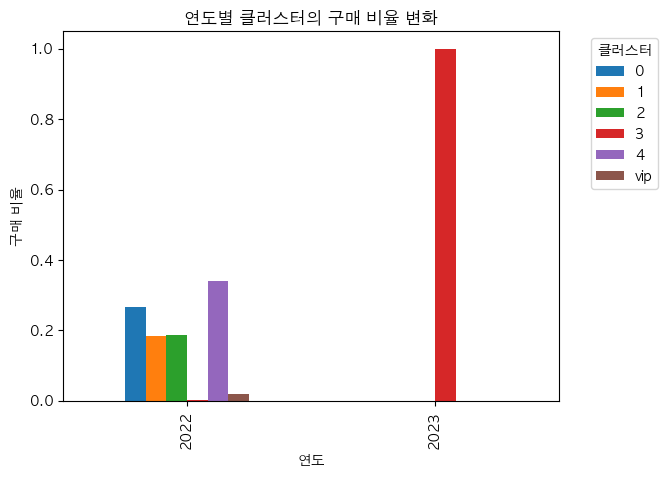

In [229]:
# 연도별 클러스터의 구매 비율 계산
purchase_ratio = df[df['ActionType']=='purchase'].groupby(['year', 'cluster_plus']).size().unstack()
purchase_ratio = purchase_ratio.div(purchase_ratio.sum(axis=1), axis=0)

# 시각화
plt.figure(figsize=(20,6))
purchase_ratio.plot(kind='bar')
plt.title('연도별 클러스터의 구매 비율 변화')
plt.xlabel('연도')
plt.ylabel('구매 비율')
plt.legend(title='클러스터', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [218]:
purchase_ratio

cluster_plus,0,1,2,3,4,vip
year,,,,,,
2022,0.267112,0.184458,0.187365,0.00181,0.338761,0.020493
2023,NaN,NaN,NaN,1.00000,NaN,NaN


In [230]:
real_log = pd.read_csv('/Users/hj/Documents/Four-A/2nd dataset/khj/data/real_real_log.csv')
real_log

,Unnamed: 0,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Adjusted_Timestamp
0,3,74377,view,1484,108329.532942,NaN,NaN,2022-02-17 19:07:19.511967
1,4,74377,purchase,1484,108329.532942,NaN,NaN,2022-03-20 04:26:25.511967
2,5,74377,view,1063,14371.764488,NaN,NaN,2022-03-02 04:43:47.511967
3,6,74377,purchase,1063,14371.764488,NaN,NaN,2022-03-22 00:42:08.511967
4,7,74377,ad_click,1203,85293.452164,ad_google,175.38,2022-04-16 22:19:28.511967
...,...,...,...,...,...,...,...,...
3096926,12,454879,view,1250,100420.934163,NaN,NaN,2022-05-27 08:18:40.554370
3096927,13,454879,view,1250,100420.934163,NaN,NaN,2022-04-25 00:41:09.554370
3096928,14,454879,share,1250,100420.934163,NaN,NaN,2022-06-14 03:44:21.554370
3096929,15,454879,basket,1250,100420.934163,NaN,NaN,2022-05-13 11:09:41.554370


In [235]:
df.head(20)

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,GoodsCode_ad,eval_type,cluster_plus,Category,OriginalPrice,Inventory,year,month,day,date,YearMonth
0,4,view,1492,15020,NaN,NaN,2022-07-04 15:11:42.511967,-1,not_ad_view,NaN,Books,15020,6631,2022,7,4,2022-07-04,202207
1,4,view,1492,15020,NaN,NaN,2022-07-24 14:44:40.511967,-1,not_ad_view,NaN,Books,15020,6631,2022,7,24,2022-07-24,202207
2,6,view,1415,12980,NaN,NaN,2022-04-22 15:49:44.166991,-1,not_ad_view,4,Health & Beauty,12980,9905,2022,4,22,2022-04-22,202204
3,6,purchase,1437,35290,NaN,NaN,2022-04-26 21:46:00.166991,-1,not_ad_purchase,4,Home & Garden,35290,3056,2022,4,26,2022-04-26,202204
4,6,view,1217,16220,NaN,NaN,2022-05-03 14:26:12.811783,-1,not_ad_view,4,Books,16220,6429,2022,5,3,2022-05-03,202205
5,6,view,1047,6670,NaN,NaN,2022-05-03 20:32:37.166991,-1,not_ad_view,4,Health & Beauty,6670,1341,2022,5,3,2022-05-03,202205
6,6,view,1047,6670,NaN,NaN,2022-05-04 12:39:47.166991,-1,not_ad_view,4,Health & Beauty,6670,1341,2022,5,4,2022-05-04,202205
7,6,ad_click,1437,35290,ad_google,182.31,2022-05-07 21:00:59.166991,1437,ad_click,4,Home & Garden,35290,3056,2022,5,7,2022-05-07,202205
8,6,view,1437,35290,NaN,NaN,2022-05-12 10:25:41.166991,1437,ad_view,4,Home & Garden,35290,3056,2022,5,12,2022-05-12,202205
9,6,basket,1217,16220,NaN,NaN,2022-05-18 03:08:13.811783,-1,not_ad_basket,4,Books,16220,6429,2022,5,18,2022-05-18,202205
